<a href="https://colab.research.google.com/github/dariobublitz/DS/blob/main/KNN_Bublitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#d776c3'>KNN (K-Nearest Neighbors)

En este trabajo, exploraremos el algoritmo KNN (K-Nearest Neighbors) para abordar un problema de aprendizaje supervisado en el ámbito de la predicción de la tasa de abandono de clientes, también conocida como 'churn'. El algoritmo KNN es una herramienta potente y versátil en el campo del aprendizaje automático, y su enfoque de basarse en la proximidad de los puntos de datos lo convierte en un candidato ideal para abordar problemas de clasificación y regresión.

El objetivo de este estudio es investigar la aplicabilidad y el rendimiento del algoritmo KNN en la predicción de la variable dicotómica 'churn' en un conjunto de datos de clientes. A lo largo del trabajo, se hará hincapié en la importancia de la estandarización de los datos, el uso adecuado de los datos de entrenamiento y prueba y el ajuste de hiperparámetros para garantizar la eficacia del modelo.

Al final del trabajo, se espera que los lectores comprendan cómo implementar y ajustar el algoritmo KNN para abordar problemas similares en sus propias aplicaciones, así como apreciar las ventajas y limitaciones de este enfoque en el aprendizaje supervisado.

In [3]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#load dataset 
permanece= pd.read_csv('/content/drive/MyDrive/colab/Bank_Customer_Churn_Prediction.csv')
permanece.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
permanece.shape

(10000, 12)

In [7]:
#chequeo de nulos
permanece.isnull().sum()


customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [8]:
#chequeo de variables
permanece.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [9]:
permanece.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [10]:
#seleccion de variables categoricas

cat_columns = permanece.select_dtypes(include='object').columns
numeric_columns = permanece.select_dtypes(include=np.number).columns

Vamos a chequear la cantidad de valores diferentes en cada categorica.

In [11]:
#chequeo de dimensionalidad de variables categoricas
lista = []
#loop por columnas categoricas
for col in cat_columns:
  info = (col, permanece[col].nunique(), permanece[col].unique() )
  lista.append(info)
pd.DataFrame(lista, columns=['feature', 'cantidad', 'valores'])

,feature,cantidad,valores
0,country,3,"[France, Spain, Germany]"
1,gender,2,"[Female, Male]"


## Transformacion de categórica a numérica:

 One Hot encoder

### Generacion de modelos

1. Imput y targuet
2. Realizamos un split
2. Transformacion de valores de preproceso para train dataset
3. Entrenamiento 
4. Transformacion en base a lo anterior en el test
5. Predicción
6. Métrica



In [12]:
#chequeo de desbalanceo
permanece.churn.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: churn, dtype: float64

In [13]:
#1. input y target

X = permanece.drop(['customer_id','churn'], axis=1)
y = permanece['churn']

#2. split de modelo
from sklearn.model_selection import train_test_split

Xx_train , Xx_test, yy_train, yy_test = train_test_split(X, y , test_size=0.2, random_state=10, stratify=y)

print(Xx_train.shape, yy_train.shape,Xx_test.shape , yy_test.shape)

(8000, 10) (8000,) (2000, 10) (2000,)


In [14]:
Xx_train.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,France,Male,30,2,131406.56,1,1,1,47952.45
9654,834,Spain,Male,34,5,0.00,2,0,0,53437.10
4431,616,Germany,Female,42,6,117899.95,2,0,0,150266.81
7206,753,Germany,Female,47,1,131160.85,1,1,0,197444.69
5214,740,Germany,Female,57,3,113386.36,2,1,1,65121.63


In [15]:
Xx_test.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,Germany,Female,56,2,111920.13,3,1,0,197634.11
5652,691,France,Female,29,9,0.00,2,0,0,199635.93
4081,721,Spain,Male,33,5,0.00,2,0,1,117626.90
2152,745,France,Female,55,9,110123.59,1,0,1,51548.14
641,706,France,Female,29,5,112564.62,1,1,0,42334.38


In [16]:
yy_train.head()

4498    0
9654    0
4431    0
7206    0
5214    1
Name: churn, dtype: int64

In [17]:
yy_test.head()

2495    1
5652    0
4081    0
2152    1
641     0
Name: churn, dtype: int64

### Generacion de modelos

1. Imput y targuet
2. Realizamos un split
2. Transformacion de valores de preproceso para train dataset
3. Entrenamiento 
4. Transformacion en base a lo anterior en el test
5. Predicción
6. Métrica



In [18]:
#chequeo de desbalanceo
permanece.churn.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: churn, dtype: float64

In [19]:
#1. imput y target

X = permanece.drop(['customer_id','churn'], axis=1)
y = permanece['churn']

#2. split de modelo
from sklearn.model_selection import train_test_split

Xx_train , Xx_test, yy_train, yy_test = train_test_split(X, y , test_size=0.2, random_state=10, stratify=y)

print(Xx_train.shape, yy_train.shape,Xx_test.shape , yy_test.shape)

(8000, 10) (8000,) (2000, 10) (2000,)


In [20]:
Xx_train.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,France,Male,30,2,131406.56,1,1,1,47952.45
9654,834,Spain,Male,34,5,0.00,2,0,0,53437.10
4431,616,Germany,Female,42,6,117899.95,2,0,0,150266.81
7206,753,Germany,Female,47,1,131160.85,1,1,0,197444.69
5214,740,Germany,Female,57,3,113386.36,2,1,1,65121.63


In [21]:
Xx_test.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,Germany,Female,56,2,111920.13,3,1,0,197634.11
5652,691,France,Female,29,9,0.00,2,0,0,199635.93
4081,721,Spain,Male,33,5,0.00,2,0,1,117626.90
2152,745,France,Female,55,9,110123.59,1,0,1,51548.14
641,706,France,Female,29,5,112564.62,1,1,0,42334.38


In [22]:
yy_train.head()

4498    0
9654    0
4431    0
7206    0
5214    1
Name: churn, dtype: int64

In [23]:
yy_test.head()

2495    1
5652    0
4081    0
2152    1
641     0
Name: churn, dtype: int64

# <font color='yellow'>OneHotEncoder

In [24]:

# Importar el OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

Xx_train_ohe=Xx_train.copy()
Xx_test_ohe=Xx_test.copy()
# Generar el encoder
ohe = OneHotEncoder(drop='first', sparse=False)
ohe.fit(Xx_train_ohe[['country','gender'] ])

Xx_train_ohe = ohe.transform(Xx_train_ohe[['country','gender'] ])
Xx_test_ohe = ohe.transform(Xx_test_ohe[['country','gender'] ])
# Ajustar el encoder en el conjunto de entrenamiento

ohe.get_feature_names_out()
#Create a Pandas DataFrame of the hot encoded column
Xx_train_ohe = pd.DataFrame(Xx_train_ohe, columns=ohe.get_feature_names_out())
Xx_test_ohe = pd.DataFrame(Xx_test_ohe, columns=ohe.get_feature_names_out())

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


la mayoría de los algoritmos requieren que las características categóricas sean transformadas en números.(*Algunos algoritmos, como CatBoost y LightGBM, pueden manejar características categóricas directamente*)

La elección entre One-Hot Encoding y Ordinal Encoding depende del tipo de datos que estés manejando y del algoritmo de aprendizaje automático que estés utilizando.

1. **One-Hot Encoding:** Esta técnica es útil cuando no hay un orden implícito en las categorías de una característica. En One-Hot Encoding, se crea una nueva característica binaria para cada categoría única en la característica original. Esto puede resultar en un gran número de características adicionales si hay muchas categorías únicas. Sin embargo, al no asignar un orden, One-Hot Encoding evita la introducción de relaciones espurias entre las categorías. Funciona bien con la mayoría de los algoritmos de aprendizaje automático, incluidos los modelos lineales y los árboles de decisión.

2. **Ordinal Encoding:** Esta técnica es útil cuando hay un orden implícito en las categorías de una característica. En Ordinal Encoding, se asigna un valor entero único a cada categoría en función de su orden. Aunque reduce la dimensionalidad en comparación con One-Hot Encoding, también introduce una relación de orden entre las categorías, lo que puede no ser apropiado si no hay una relación de orden real entre ellas. Funciona bien con algoritmos basados en árboles, como árboles de decisión y Random Forest, pero puede no ser adecuado para modelos lineales si la relación de orden no es apropiada.

La elección entre One-Hot Encoding y Ordinal Encoding debe basarse en la naturaleza de tus datos y en el algoritmo de aprendizaje automático que estés utilizando. En general, si no hay un orden natural entre las categorías, es mejor usar One-Hot Encoding, ya que evita la introducción de relaciones espurias. **Si hay un orden natural** y estás utilizando un algoritmo basado en árboles, **Ordinal Encoding puede ser una buena opción**.

## Train

In [25]:
Xx_train_ohe.head()

,country_Germany,country_Spain,gender_Male
0,0.0,0.0,1.0
1,0.0,1.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [26]:
num_col=[ 'credit_score', 'age', 'tenure', 'balance',
        'products_number', 'credit_card', 'active_member', 'estimated_salary']
cat_col=['country','gender']        


In [27]:
Xx_train[num_col].head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,30,2,131406.56,1,1,1,47952.45
9654,834,34,5,0.00,2,0,0,53437.10
4431,616,42,6,117899.95,2,0,0,150266.81
7206,753,47,1,131160.85,1,1,0,197444.69
5214,740,57,3,113386.36,2,1,1,65121.63


In [28]:
# Establecer el índice del DataFrame train
Xx_train = Xx_train.set_index(Xx_train.index, drop=False)
# Establecer el índice del segundo DataFrame
Xx_train_ohe = Xx_train_ohe.set_index(Xx_train.index)

In [29]:
Xx_train_ohe.head()

,country_Germany,country_Spain,gender_Male
4498,0.0,0.0,1.0
9654,0.0,1.0,1.0
4431,1.0,0.0,0.0
7206,1.0,0.0,0.0
5214,1.0,0.0,0.0


In [30]:
# Concatenar las variables numéricas y categóricas transformadas en un solo DataFrame
X_train_encoded = pd.concat([Xx_train[num_col], Xx_train_ohe], axis=1)

In [31]:
Xx_train[num_col].shape, Xx_train_ohe.shape, X_train_encoded.shape

((8000, 8), (8000, 3), (8000, 11))

In [32]:
X_train_encoded.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
4498,570,30,2,131406.56,1,1,1,47952.45,0.0,0.0,1.0
9654,834,34,5,0.00,2,0,0,53437.10,0.0,1.0,1.0
4431,616,42,6,117899.95,2,0,0,150266.81,1.0,0.0,0.0
7206,753,47,1,131160.85,1,1,0,197444.69,1.0,0.0,0.0
5214,740,57,3,113386.36,2,1,1,65121.63,1.0,0.0,0.0


## Test

In [33]:
Xx_test_ohe.head()

,country_Germany,country_Spain,gender_Male
0,1.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,1.0,1.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [34]:
# Establecer el índice del DataFrame train
Xx_test = Xx_test.set_index(Xx_test.index, drop=False)
# Establecer el índice del segundo DataFrame
Xx_test_ohe = Xx_test_ohe.set_index(Xx_test.index)

In [35]:
Xx_test_ohe.head()

,country_Germany,country_Spain,gender_Male
2495,1.0,0.0,0.0
5652,0.0,0.0,0.0
4081,0.0,1.0,1.0
2152,0.0,0.0,0.0
641,0.0,0.0,0.0


In [36]:
# Concatenar las variables numéricas y categóricas transformadas en un solo DataFrame
X_test_encoded = pd.concat([Xx_test[num_col], Xx_test_ohe], axis=1)

In [37]:
X_test_encoded.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
2495,466,56,2,111920.13,3,1,0,197634.11,1.0,0.0,0.0
5652,691,29,9,0.00,2,0,0,199635.93,0.0,0.0,0.0
4081,721,33,5,0.00,2,0,1,117626.90,0.0,1.0,1.0
2152,745,55,9,110123.59,1,0,1,51548.14,0.0,0.0,0.0
641,706,29,5,112564.62,1,1,0,42334.38,0.0,0.0,0.0


In [38]:
X_test_encoded.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
2495,466,56,2,111920.13,3,1,0,197634.11,1.0,0.0,0.0
5652,691,29,9,0.00,2,0,0,199635.93,0.0,0.0,0.0
4081,721,33,5,0.00,2,0,1,117626.90,0.0,1.0,1.0
2152,745,55,9,110123.59,1,0,1,51548.14,0.0,0.0,0.0
641,706,29,5,112564.62,1,1,0,42334.38,0.0,0.0,0.0


In [39]:
Xx_test[num_col].shape,Xx_test_ohe.shape,X_test_encoded.shape

((2000, 8), (2000, 3), (2000, 11))

In [40]:
X_train_encoded.isnull().sum(),X_test_encoded.isnull().sum()

(credit_score        0
 age                 0
 tenure              0
 balance             0
 products_number     0
 credit_card         0
 active_member       0
 estimated_salary    0
 country_Germany     0
 country_Spain       0
 gender_Male         0
 dtype: int64,
 credit_score        0
 age                 0
 tenure              0
 balance             0
 products_number     0
 credit_card         0
 active_member       0
 estimated_salary    0
 country_Germany     0
 country_Spain       0
 gender_Male         0
 dtype: int64)

 El z-score, también conocido como estandarización, es una técnica que transforma los datos de modo que tengan una media de 0 y una desviación estándar de 1. Esto se logra restando la media y dividiendo por la desviación estándar para cada característica.

La estandarización es útil en algoritmos como KNN porque estos son sensibles a la escala de las características. Al estandarizar los datos, garantizas que todas las características tengan la misma importancia y se encuentren en la misma escala.

Vamos a aplicar la estandarización usando la función `StandardScaler` de `scikit-learn:`

In [41]:
from sklearn.preprocessing import StandardScaler

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train_encoded)

# Transformar los datos de prueba (¡no ajustar!)
X_test_scaled = scaler.transform(X_test_encoded)  

En el contexto de preprocesamiento de datos en Machine Learning, "ajustar" y "transformar" son dos conceptos relacionados pero distintos. Ambos se utilizan en el proceso de aplicar transformaciones a los datos, como normalización, estandarización o codificación de variables categóricas.

## Ajustar (fit):
Cuando ajustas un objeto de preprocesamiento, estás calculando los parámetros necesarios para aplicar una transformación en los datos. Por ejemplo, en el caso de la estandarización, ajustar implica calcular la media y la desviación estándar de cada característica en los datos. Estos parámetros se almacenan en el objeto de preprocesamiento para su uso posterior.

El ajuste generalmente se realiza utilizando los datos de entrenamiento, ya que los parámetros de transformación deben calcularse sobre este conjunto para evitar la fuga de datos (data leakage) del conjunto de prueba.

## Transformar (transform):
Después de ajustar un objeto de preprocesamiento, puedes usarlo para transformar los datos. La transformación aplica la operación de preprocesamiento utilizando los parámetros calculados durante el ajuste. Por ejemplo, en el caso de la estandarización, la transformación implica restar la media y dividir por la desviación estándar (previamente calculadas durante el ajuste) para cada característica en los datos.

La transformación se aplica tanto a los datos de entrenamiento como a los de prueba, utilizando los parámetros calculados durante el ajuste en los datos de entrenamiento.

## Similitudes y diferencias:

* Ambos son pasos en el proceso de preprocesamiento de datos.
* El ajuste se realiza solo en los datos de entrenamiento, mientras que la transformación se aplica a ambos conjuntos de datos (entrenamiento y prueba).
* El ajuste implica el cálculo de parámetros, mientras que la transformación implica aplicar la operación de preprocesamiento utilizando esos parámetros.

En resumen, primero ajustas un objeto de preprocesamiento utilizando los datos de entrenamiento para calcular los parámetros necesarios. Luego, transformas tanto los datos de entrenamiento como los de prueba utilizando esos parámetros.

Cuando aplicas la estandarización (escalado) utilizando la media y la desviación estándar calculadas en base al conjunto de entrenamiento, los datos escalados en el conjunto de entrenamiento (`X_train_scaled`) tendrán, en promedio, una media **muy cercana** a cero y una desviación estándar cercana a uno.

Por otro lado, al aplicar la misma transformación al conjunto de prueba (`X_test_scaled`) utilizando la media y la desviación estándar del conjunto de entrenamiento, no se garantiza que el conjunto de prueba tenga una media exactamente de cero y una desviación estándar de uno. Sin embargo, es probable que estén cerca de esos valores, especialmente si la distribución de los datos en ambos conjuntos es similar.

Recuerda que es importante utilizar la media y la desviación estándar del conjunto de entrenamiento para transformar el conjunto de prueba, en lugar de calcular estos parámetros por separado para cada conjunto. Esto evita la fuga de datos y asegura que el modelo se evalúe en condiciones similares a las de su entrenamiento.

# <font color='lightgreen'># Transformar los datos de prueba (¡no ajustar!)</font>
Esta línea de comentario indica que se debe realizar una **transformación en los datos de prueba utilizando los parámetros obtenidos del conjunto de entrenamiento,** pero no se deben "ajustar" (es decir, no se deben recalcular) los parámetros de transformación en base al conjunto de prueba.

Por ejemplo, supongamos que estás utilizando la estandarización, que implica restar la media y dividir por la desviación estándar. Durante el proceso de ajuste o "fit", se calculan la media y la desviación estándar del conjunto de entrenamiento. Cuando aplicas la transformación en los datos de prueba, debes usar los valores de media y desviación estándar calculados previamente a partir del conjunto de entrenamiento. No debes recalcular estos valores en base al conjunto de prueba, ya que esto puede introducir un sesgo y afectar negativamente el rendimiento del modelo.

La idea detrás de esto es que el modelo debe aprender y adaptarse únicamente a partir del conjunto de entrenamiento, y luego evaluar su rendimiento en un conjunto de datos desconocido (el conjunto de prueba) sin utilizar ninguna información adicional de este último. Al no ajustar los parámetros de transformación en el conjunto de prueba, se evita la fuga de datos y se garantiza una evaluación justa del rendimiento del modelo.

# <font color='#d776c3'>KNN

## 1. Importar las bibliotecas necesarias:

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import neighbors
from sklearn.metrics import classification_report, confusion_matrix

## 2. Definir la función para entrenar y evaluar el modelo KNN con diferentes valores de k:

In [44]:
def knn_comparison(X_train, X_test, y_train, y_test, k):
    # Crear y entrenar el clasificador KNN
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)

    # Hacer predicciones en el conjunto de prueba
    y_pred = clf.predict(X_test)

    # Calcular y mostrar las métricas de rendimiento
    print("K =", k)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-------------------------------------------------")

## 3. Utilizar la función knn_comparison con tus conjuntos de datos y diferentes valores de k:

In [45]:
for k in [1, 5, 20, 30, 40, 80]:
    knn_comparison(X_train_scaled, X_test_scaled, yy_train, yy_test, k)

K = 1
[[1405  188]
 [ 221  186]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1593
           1       0.50      0.46      0.48       407

    accuracy                           0.80      2000
   macro avg       0.68      0.67      0.67      2000
weighted avg       0.79      0.80      0.79      2000

-------------------------------------------------
K = 5
[[1522   71]
 [ 258  149]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.90      1593
           1       0.68      0.37      0.48       407

    accuracy                           0.84      2000
   macro avg       0.77      0.66      0.69      2000
weighted avg       0.82      0.84      0.82      2000

-------------------------------------------------
K = 20
[[1569   24]
 [ 303  104]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      1593
           1       0.81      0.26    

La función knn_comparison ahora toma los conjuntos de datos X_train_scaled, X_test_scaled, yy_train, yy_test y un valor de k. Entrena el clasificador KNN con los datos de entrenamiento y evalúa su rendimiento en el conjunto de prueba utilizando diferentes métricas, como la matriz de confusión y el informe de clasificación.

Dado que tus datos tienen múltiples características, no es posible visualizar las regiones de decisión en un gráfico 2D. En su lugar, estamos evaluando el rendimiento del modelo utilizando **métricas de clasificación.**





### Vamos a a crear un gráfico para visualizar el rendimiento del modelo KNN con diferentes valores de k.

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def knn_comparison2(X_train, X_test, y_train, y_test, k):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    return precision, recall, f1, accuracy

In [48]:
k_values = [1, 5, 20, 30, 40, 80]
precisions = []
recalls = []
f1_scores = []
accuracies = []

for k in k_values:
    precision, recall, f1, accuracy = knn_comparison2(X_train_scaled, X_test_scaled, yy_train, yy_test, k)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    accuracies.append(accuracy)

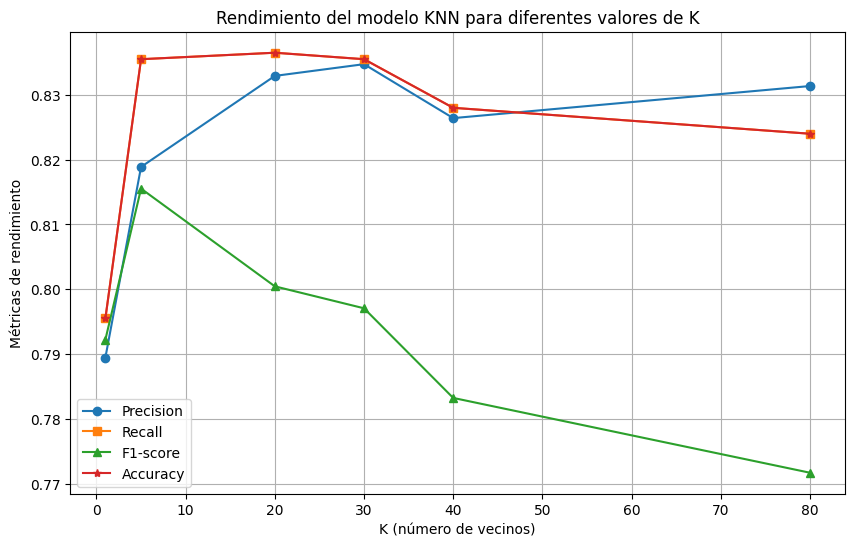

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, precisions, marker='o', label='Precision')
plt.plot(k_values, recalls, marker='s', label='Recall')
plt.plot(k_values, f1_scores, marker='^', label='F1-score')
plt.plot(k_values, accuracies, marker='*', label='Accuracy')

plt.xlabel('K (número de vecinos)')
plt.ylabel('Métricas de rendimiento')
plt.title('Rendimiento del modelo KNN para diferentes valores de K')
plt.legend()
plt.grid()
plt.show()

Este gráfico muestra cómo cambian las métricas de rendimiento (precisión, recall, f1-score y accuracy) en función de los diferentes valores de k para el modelo KNN. 

Puedes utilizar este gráfico para identificar el mejor valor de k en función de las métricas de rendimiento que más te interesan.

conclusion

En este trabajo, hemos explorado el algoritmo KNN (K-Nearest Neighbors) como un método de aprendizaje supervisado para predecir variables dicotómicas, como la tasa de 'churn'. El algoritmo KNN es una herramienta versátil y flexible que se adapta fácilmente a diferentes problemas de clasificación y regresión.

## 1. La importancia de la estandarización:
 Para garantizar un rendimiento óptimo del algoritmo KNN, es esencial estandarizar los datos antes de entrenar y probar el modelo. La estandarización ayuda a que todas las características tengan la misma escala y, por lo tanto, evita que las características con rangos más amplios dominen a las que tienen rangos más pequeños. La estandarización  o el escalado z-score, que transforman los datos para que tengan una media de cero y una desviación estándar de uno.

## 2. Usar solo los datos de entrenamiento: 
Al aplicar la estandarización y ajustar el algoritmo, es crucial utilizar solo los datos de entrenamiento. Los datos de prueba se deben mantener completamente separados y no se deben utilizar para ajustar el modelo ni para la estandarización. Al hacerlo, garantizamos que los datos de prueba no influyan en el proceso de entrenamiento, lo que nos permite obtener una evaluación justa y realista del rendimiento del modelo en datos no vistos.

## 3. Problema supervisado:
Estamos usando KNN como un algoritmo de aprendizaje supervisado, lo que significa que, para entrenar el modelo, necesitamos un conjunto de datos etiquetado que contenga características y etiquetas correspondientes (en nuestro caso, la tasa de 'churn'). Utilizando este conjunto de datos etiquetado, el algoritmo KNN aprende a predecir la variable objetivo en función de las características proporcionadas.

## 4. Versatilidad y flexibilidad:
 El algoritmo KNN es altamente flexible debido a su simplicidad y su capacidad para adaptarse fácilmente a diferentes problemas. KNN puede utilizarse en problemas de clasificación y regresión, y su rendimiento se puede ajustar fácilmente cambiando el número de vecinos (k) considerados en el proceso de decisión. Además, KNN es robusto ante ruido y outliers, lo que lo convierte en una herramienta poderosa y confiable en la práctica del aprendizaje automático.


### En resumen, el algoritmo KNN_para_predecir es un enfoque de aprendizaje supervisado versátil y flexible para predecir variables como la tasa de 'churn'. La estandarización y el uso adecuado de los datos de entrenamiento y prueba son aspectos fundamentales para garantizar el éxito en la implementación de este algoritmo.